# Exploratory Data Analysis (EDA) Steps:


## Data Summarization:

Obtain summary statistics (mean, median, variance, etc.) to understand the distribution of data.

## Univariate Analysis:
Analyze individual variables to understand their distribution, central tendencies, and spread. Use visualizations like histograms, boxplots, or kernel density estimates.

## Bivariate/Multivariate Analysis:
Explore relationships between variables using scatter plots, pair plots, or correlation matrices to identify patterns and dependencies.

## Visualizing Time Series Data:
Plot time series data to observe trends, seasonality, and any other patterns. Use line plots, stacked line plots, or heatmaps for visual clarity.

## Temporal Patterns and Seasonality:
Decompose the time series into its components (trend, seasonality, residual) and analyze each component separately to understand their impact on the overall series.

## Correlation and Autocorrelation:
Calculate correlations between different time lags and observe autocorrelation plots to identify patterns and potential time dependencies.

## Hypothesis Testing:
Formulate hypotheses based on initial observations and test them statistically to validate assumptions about the data.

In [1]:
import pandas as pd # for basic analysis
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv('data folder/BTC-USD DAILY.csv') # reading the data 

In [3]:
data.head(5) #Top 5 rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [4]:
data.info() #Gives the information about columns and rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1492 non-null   object 
 1   Open       1492 non-null   float64
 2   High       1492 non-null   float64
 3   Low        1492 non-null   float64
 4   Close      1492 non-null   float64
 5   Adj Close  1492 non-null   float64
 6   Volume     1492 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 81.7+ KB


In [5]:
data.isnull().sum() # We can see there are no null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Summarization:

In [6]:
# convert the Date column into timeseries data
data['Date'] = pd.to_datetime(data['Date'])  

In [7]:
data.describe() 

,Date,Open,High,Low,Close,Adj Close,Volume
count,1492,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1.492000e+03
mean,2020-01-16 12:00:00,18834.412309,19328.141889,18277.369294,18847.704874,18847.704874,2.583255e+10
min,2018-01-01 00:00:00,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,2019-01-08 18:00:00,7184.975952,7320.137085,6939.701782,7186.172241,7186.172241,8.475918e+09
50%,2020-01-16 12:00:00,9543.832032,9717.452148,9358.137695,9544.869629,9544.869629,2.247845e+10
75%,2021-01-23 06:00:00,32745.621582,33915.827149,31244.488770,32792.104492,32792.104492,3.620490e+10
max,2022-01-31 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,17877.430021,18363.563384,17309.553030,17878.523772,17878.523772,2.103589e+10


In [8]:
data.set_index(data['Date'],inplace=True) #setting the timeseiers column as Index

In [9]:
data_for_analysis = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
correlated_Data = data_for_analysis.corr()

In [10]:
correlated_Data

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999373,0.998745,0.998395,0.998395,0.598216
High,0.999373,1.000000,0.998693,0.999283,0.999283,0.603968
Low,0.998745,0.998693,1.000000,0.999178,0.999178,0.586312
Close,0.998395,0.999283,0.999178,1.000000,1.000000,0.596597
Adj Close,0.998395,0.999283,0.999178,1.000000,1.000000,0.596597
Volume,0.598216,0.603968,0.586312,0.596597,0.596597,1.000000


# Univarint Analysis

In [11]:
# Assuming 'data' is your DataFrame containing columns like 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close'

fig = px.line(data, x='Date', y=['Open', 'High', 'Low', 'Close', 'Adj Close'],
              title='Time Series Data - Line Plots')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Values')

fig.show()

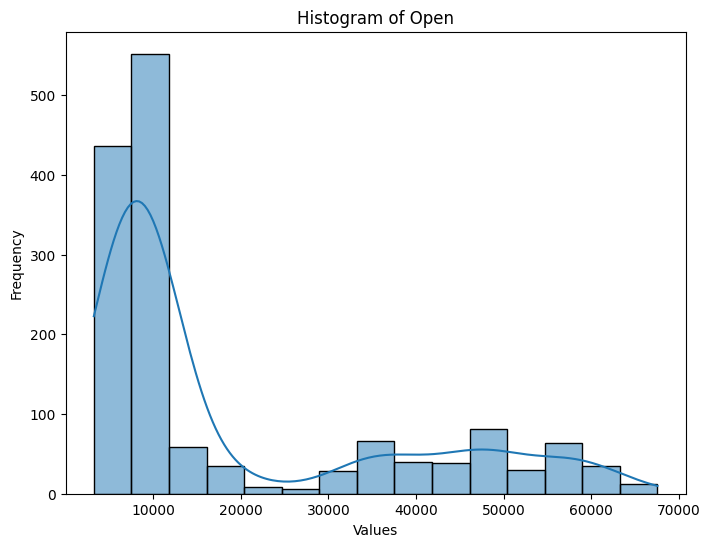

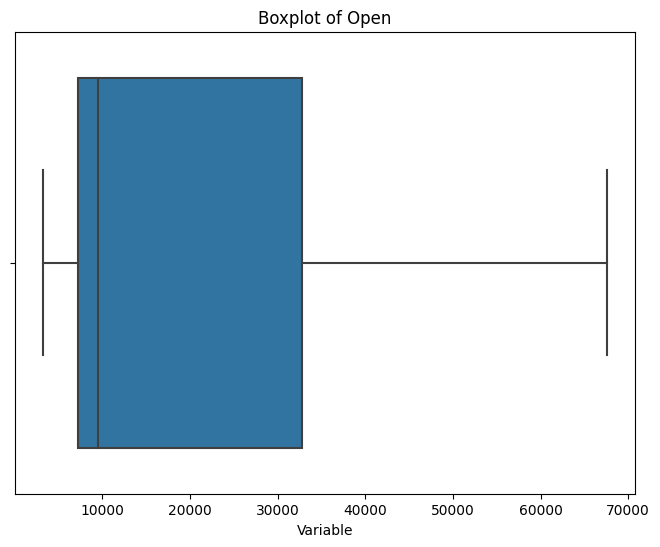

C:\Users\91845\AppData\Local\Temp\ipykernel_31480\262524072.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




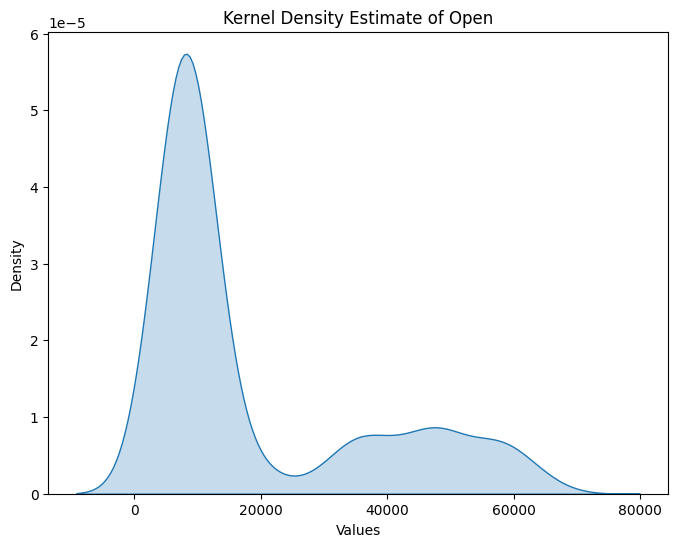

Mean of Open: 18834.412308733914
Median of Open: 9543.8320315
Standard Deviation of Open: 17877.430021447508


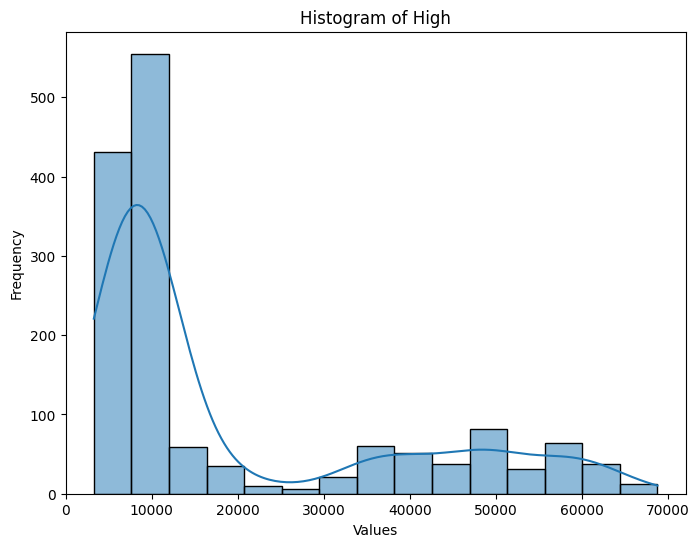

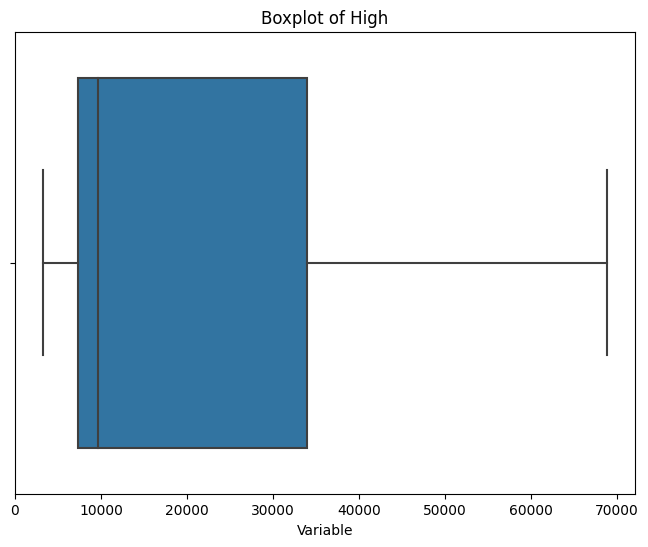

C:\Users\91845\AppData\Local\Temp\ipykernel_31480\262524072.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




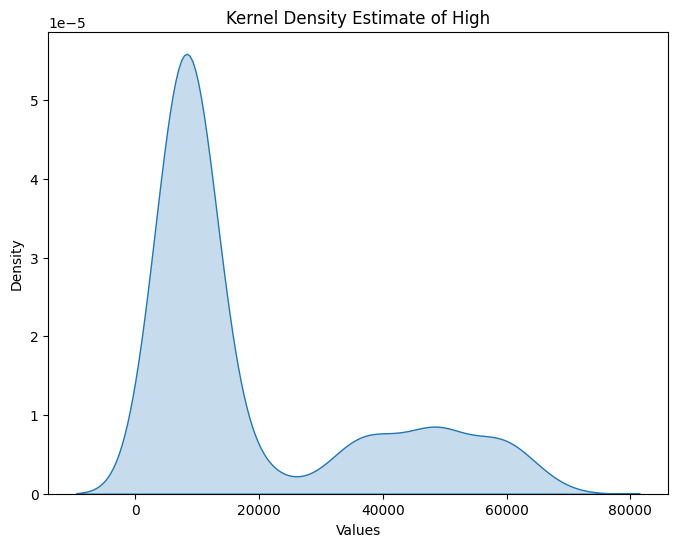

Mean of High: 19328.141889123322
Median of High: 9717.452148
Standard Deviation of High: 18363.56338436829


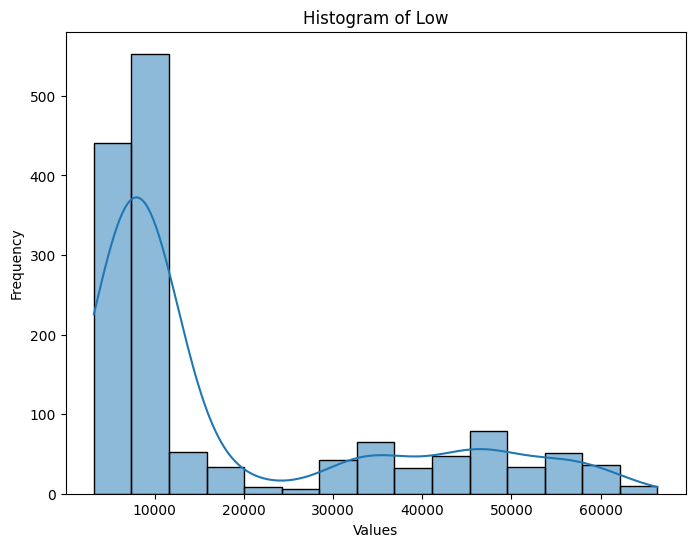

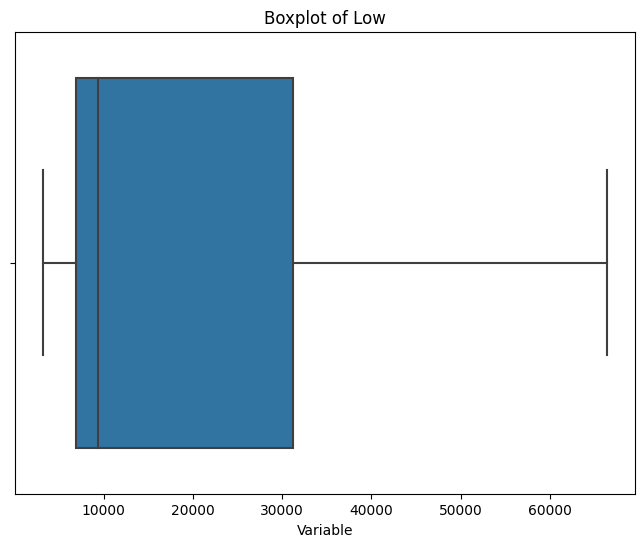

C:\Users\91845\AppData\Local\Temp\ipykernel_31480\262524072.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




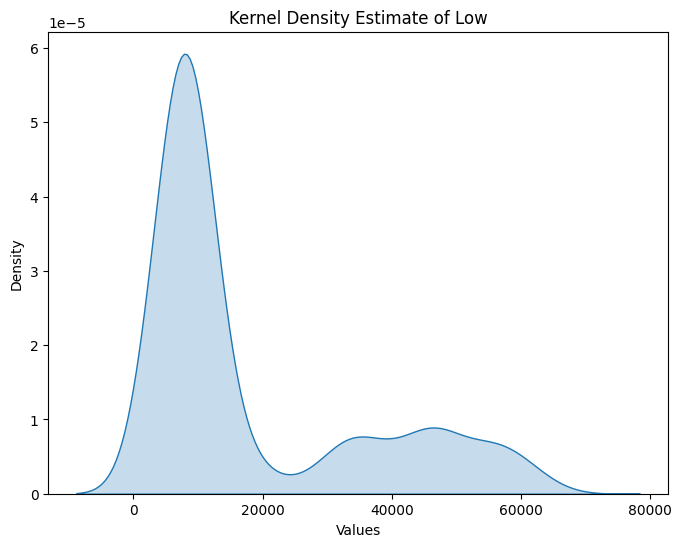

Mean of Low: 18277.369294321044
Median of Low: 9358.137695000001
Standard Deviation of Low: 17309.55302959927


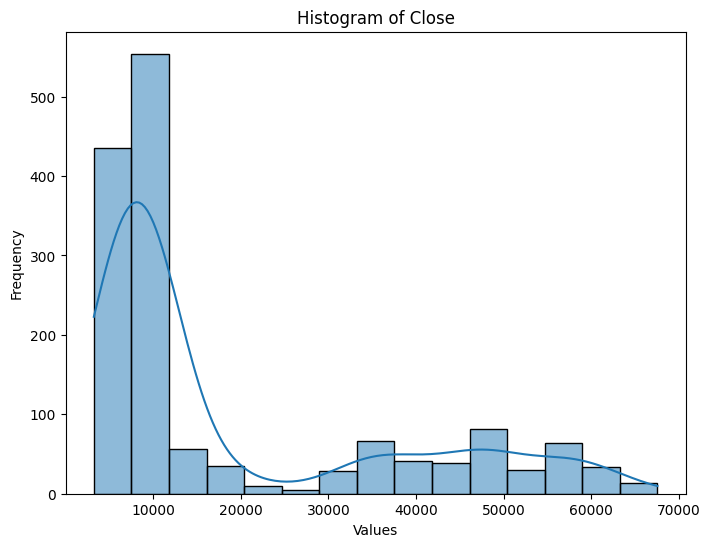

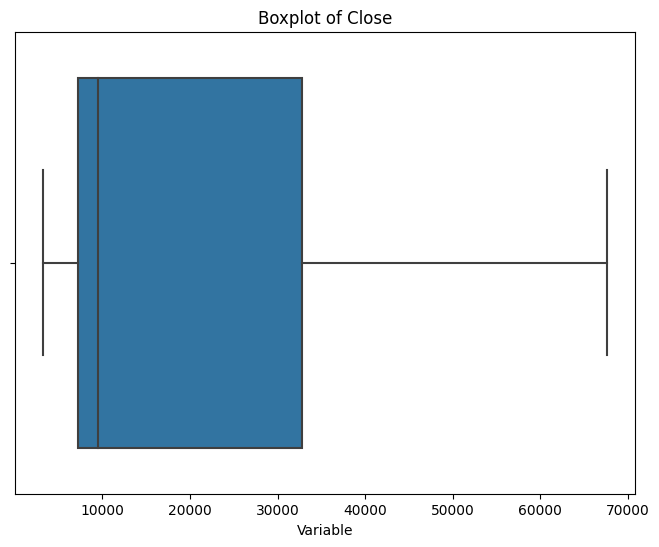

C:\Users\91845\AppData\Local\Temp\ipykernel_31480\262524072.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




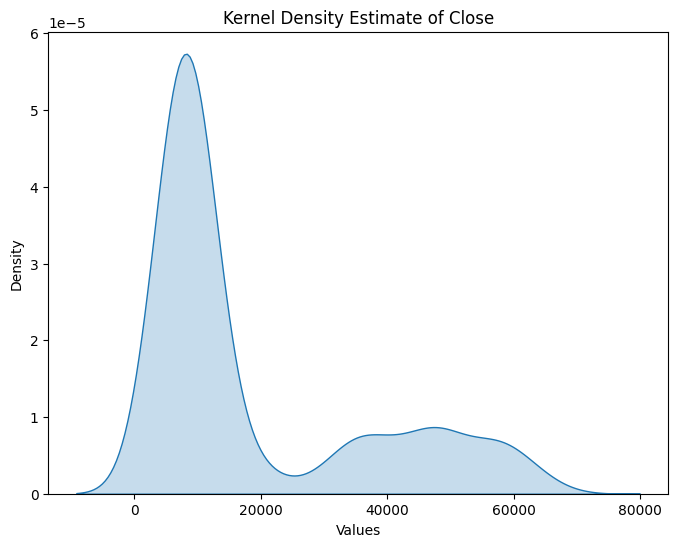

Mean of Close: 18847.704873619303
Median of Close: 9544.869629
Standard Deviation of Close: 17878.52377195851


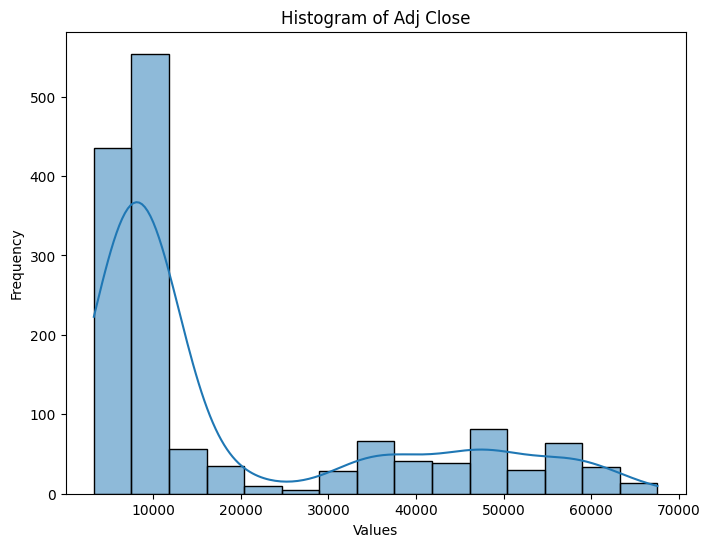

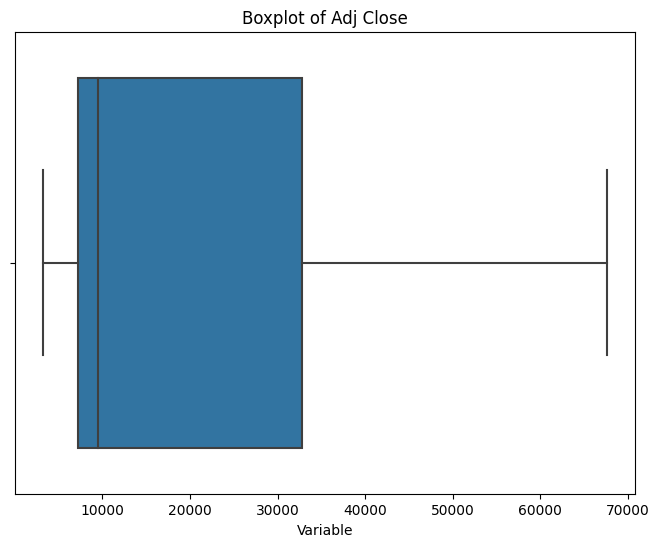

C:\Users\91845\AppData\Local\Temp\ipykernel_31480\262524072.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




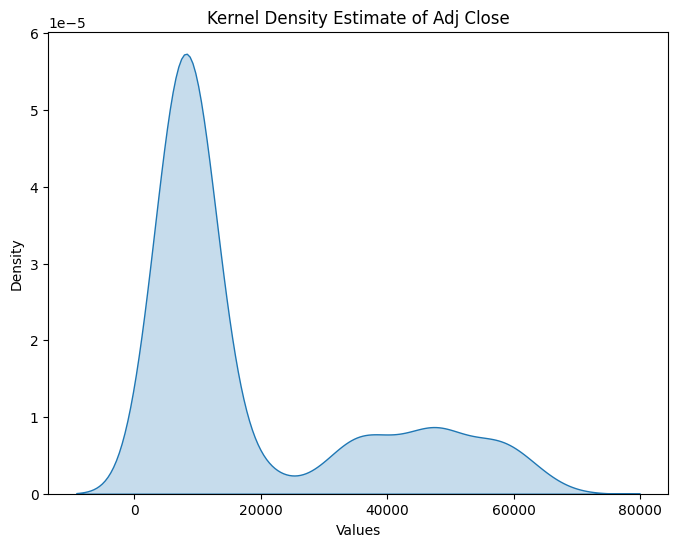

Mean of Adj Close: 18847.704873619303
Median of Adj Close: 9544.869629
Standard Deviation of Adj Close: 17878.52377195851


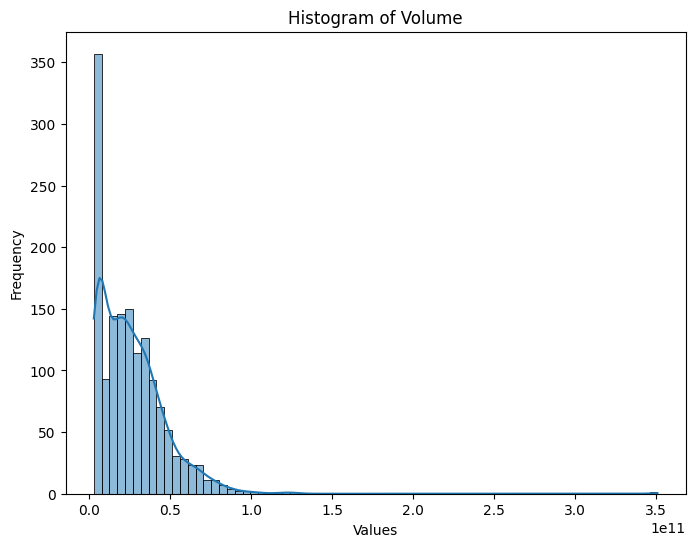

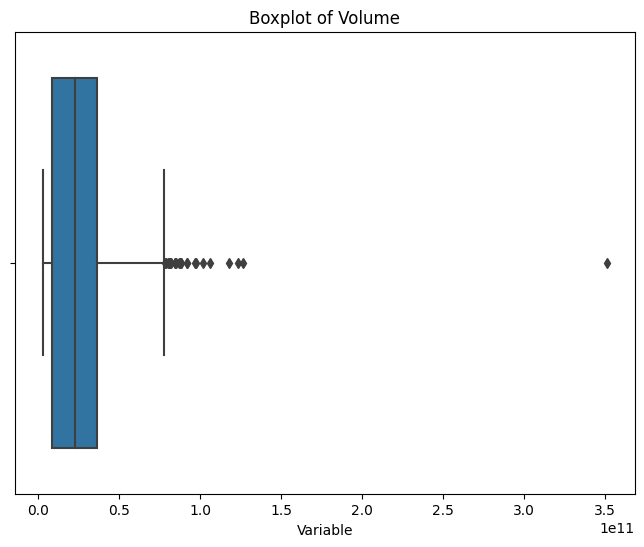

C:\Users\91845\AppData\Local\Temp\ipykernel_31480\262524072.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




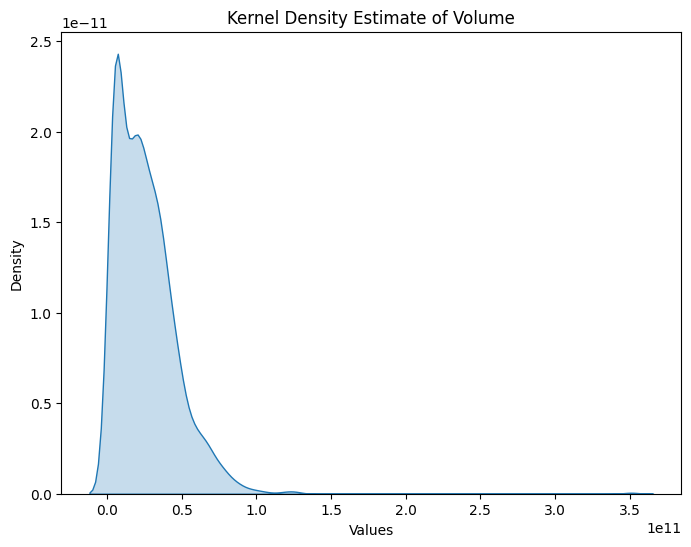

Mean of Volume: 25832552378.158848
Median of Volume: 22478454184.5
Standard Deviation of Volume: 21035886907.40186


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset and 'column_name' is the column you want to analyze
# column_name = 'Open'  # Replace 'Your_Column_Name' with the actual column name
for column_name in data.columns[1:]:
    # Plotting Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column_name], kde=True)
    plt.title('Histogram of ' + column_name)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

    # Plotting Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column_name])
    plt.title('Boxplot of ' + column_name)
    plt.xlabel('Variable')
    plt.show()

    # Plotting Kernel Density Estimate (KDE)
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data[column_name], shade=True)
    plt.title('Kernel Density Estimate of ' + column_name)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()

    # Summary statistics
    mean_value = data[column_name].mean()
    median_value = data[column_name].median()
    std_deviation = data[column_name].std()

    print(f"Mean of {column_name}: {mean_value}")
    print(f"Median of {column_name}: {median_value}")
    print(f"Standard Deviation of {column_name}: {std_deviation}")


# Bivariate/Multivariate Analysis:
`Explore relationships between variables using scatter plots, or correlation matrices to identify patterns and dependencies.`

## Correlation

In [13]:
data_for_analysis.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999373,0.998745,0.998395,0.998395,0.598216
High,0.999373,1.000000,0.998693,0.999283,0.999283,0.603968
Low,0.998745,0.998693,1.000000,0.999178,0.999178,0.586312
Close,0.998395,0.999283,0.999178,1.000000,1.000000,0.596597
Adj Close,0.998395,0.999283,0.999178,1.000000,1.000000,0.596597
Volume,0.598216,0.603968,0.586312,0.596597,0.596597,1.000000


## Scatter Plot

In [14]:
for col in data_for_analysis.columns:   
    fig = px.scatter(data, x='Date', y=[col], title='Time Series Data - Scatter Plot')
    fig.update_xaxes(title='Date')
    fig.update_yaxes(title='Values')
    fig.show()

## Report 

`1. All the columns are Highly correlated`


# Visualizing Time Series Data:
`Plot time series data to observe trends, seasonality, and any other patterns. Use line plots, stacked line plots,for visual clarity.`

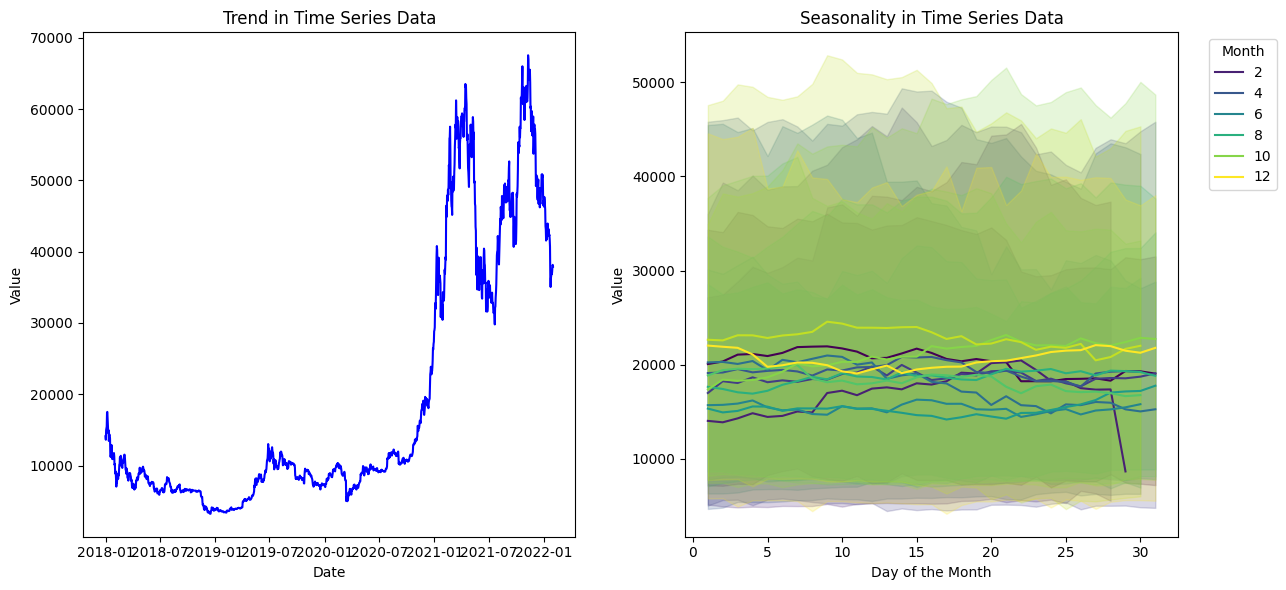

In [15]:
# Extracting month and day information to demonstrate seasonality
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Plotting trends with line plot
plt.figure(figsize=(18, 6))

plt.subplot(131)
sns.lineplot(x='Date', y='Open', data=data, color='blue')
plt.title('Trend in Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')

# Plotting seasonality with stacked line plot
plt.subplot(132)
sns.lineplot(x='Day', y='Open', hue='Month', data=data, palette='viridis')
plt.title('Seasonality in Time Series Data')
plt.xlabel('Day of the Month')
plt.ylabel('Value')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Report

`The first image shows that the value is increasing over time. The second image shows that the value is highest in the middle of the month and lowest at the beginning and end of the month.`

# Temporal Patterns and Seasonality:
`Decompose the time series into its components (trend, seasonality, residual) and analyze each component separately to understand their impact on the overall series.`

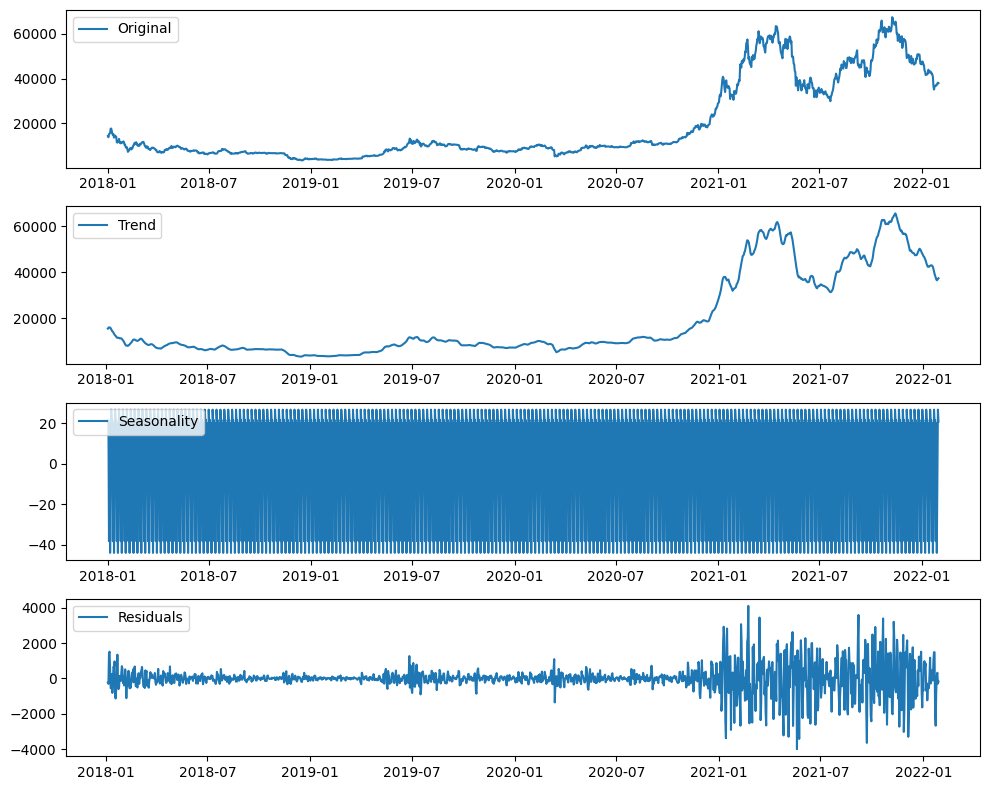

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Decomposing the time series into its components
decomposition = seasonal_decompose(data['Open'], model='additive')

# Plotting the decomposed components
plt.figure(figsize=(10, 8))


plt.subplot(411)
plt.plot(data.index, data['Open'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(data.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(data.index, decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(data.index, decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## Report

`The trend component is increasing over time. The seasonal component is highest in the middle of the year and lowest at the beginning and end of the year. The residual component is random and does not show any clear pattern.`

# Correlation and Autocorrelation:
`Calculate correlations between different time lags and observe autocorrelation plots to identify patterns and potential time dependencies.`

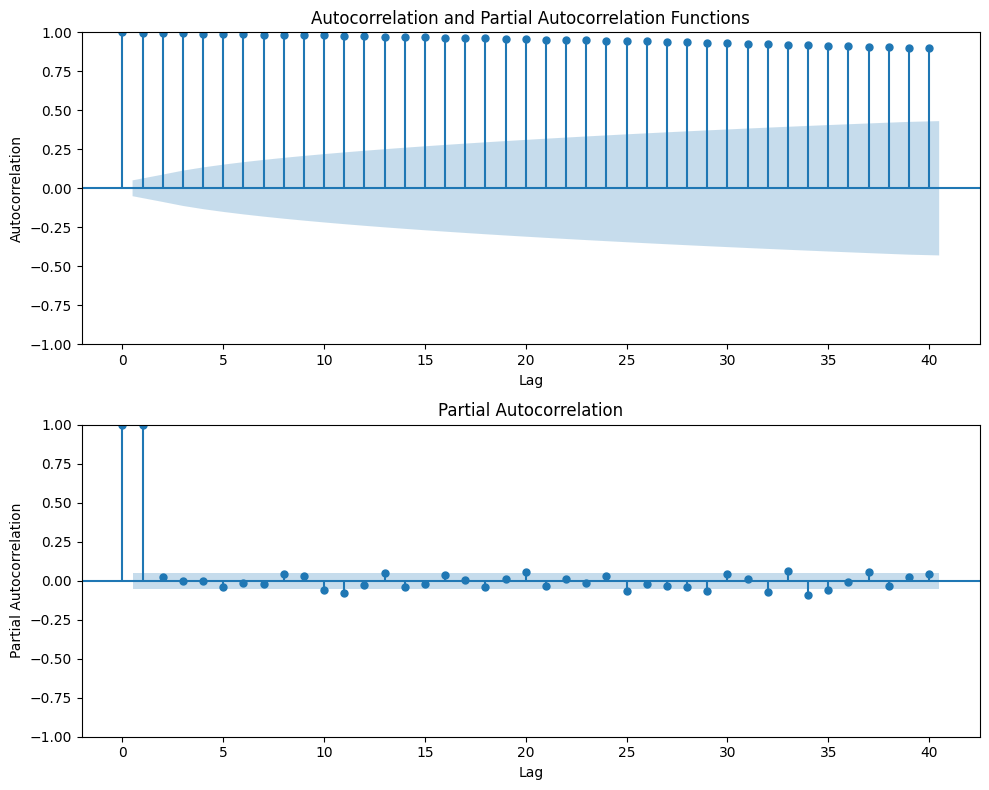

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculating autocorrelation and partial autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotting autocorrelation function (ACF)
plot_acf(data['Open'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation and Partial Autocorrelation Functions')
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')

# Plotting partial autocorrelation function (PACF)
plot_pacf(data['Open'], lags=40, ax=ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()


## `ACF and PACF plots suggest that an ARIMA model is the best fit for the data.`

## Report


`1. The first plot shows the autocorrelation function (ACF) of the residuals from the seasonal decomposition of the time series. The ACF measures the correlation between the residuals at different time lags. The second plot shows the partial autocorrelation function (PACF) of the residuals.`

`2. The PACF measures the correlation between the residuals at different time lags, after removing the effects of the correlations at shorter lags.`

`3. The ACF and PACF plots show that the residuals are not significantly correlated at any of the lags. This suggests that the seasonal decomposition has removed all of the significant autocorrelation from the time series.`

# Hypothsis Testing:


In [18]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your time series data (replace this with your actual time series data)
# For example, if your data is a pandas Series:
# data = pd.Series([...])

# Perform the ADF test
result = adfuller(data['Open'])

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -0.9878555622003392
p-value: 0.7576678944897712
Critical Values:
   1%: -3.434815425568625
   5%: -2.8635121913888306
   10%: -2.567819976000063


## Report :

`1. The data is not stationary `

`2. we need not check all  the columns ; because of high corr`

`3. we need to convert non-stationary to stationary`

# Converting Non-Stationarity to Stationarity

## Differencing :

`Stationarity often requires constant mean and variance. If a time series has a trend, differencing can help remove it.`



In [19]:
# Assuming 'data' is your non-stationary time series data
stationary_series = data[['Open', 'High', 'Low', 'Close', 'Adj Close']].diff().dropna()

In [20]:
from statsmodels.tsa.stattools import adfuller


# Perform the ADF test
result = adfuller(stationary_series['Open'])

#Null Hypo H(0) where 0.05 <= p
# Alternative Hypo H(A) p > 0.05

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -7.375616298389466
p-value: 8.73861422952593e-11
Critical Values:
   1%: -3.434815425568625
   5%: -2.8635121913888306
   10%: -2.567819976000063


In [21]:
stationary_series_ = stationary_series.reset_index()

In [22]:
# Assuming 'data' is your DataFrame containing columns like 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close'

fig = px.line(stationary_series_, x='Date', y=['Open', 'High', 'Low', 'Close', 'Adj Close'],
              title='Time Series Data - Line Plots')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Values')

fig.show()

## Report 
`1. We can see the p value is less than the critical value`

`2. hence tha data becomes stationary `

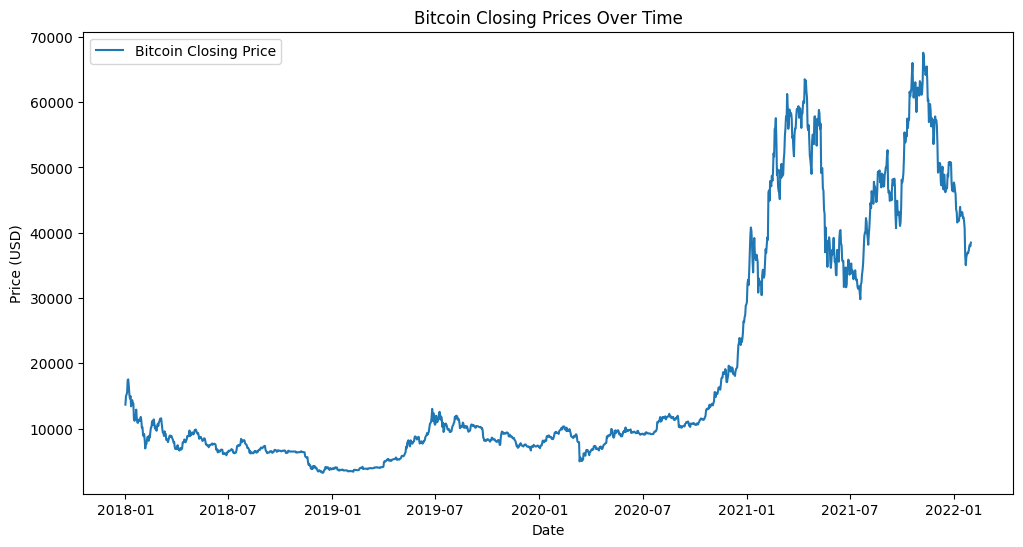

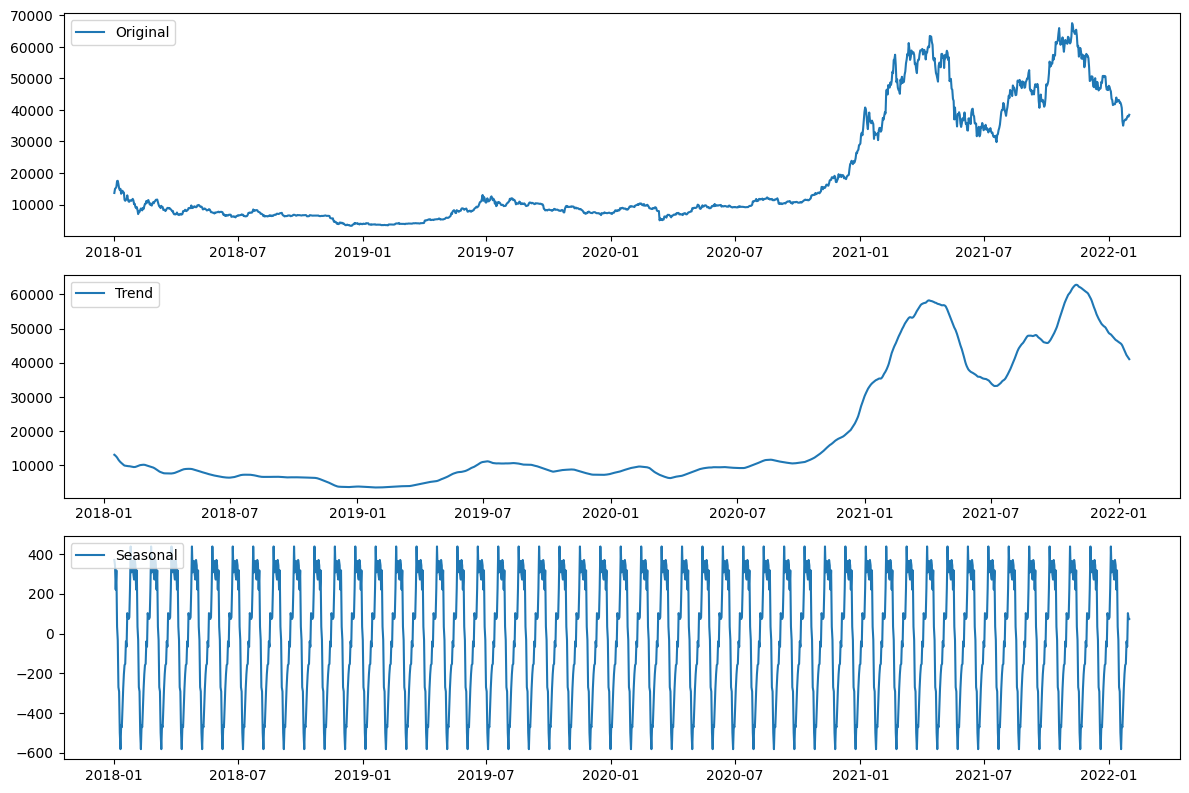

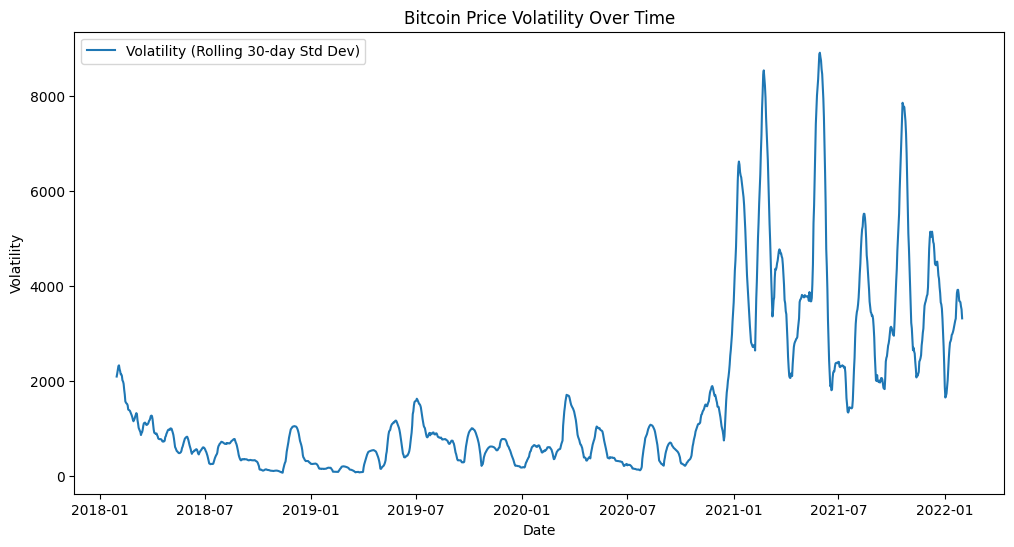

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load Bitcoin price data 
bitcoin_data = pd.read_csv('data folder/BTC-USD DAILY.csv')

# Convert 'Date' column to datetime format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Set 'Date' column as index
bitcoin_data.set_index('Date', inplace=True)

# Plot Bitcoin closing prices to visualize trend
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Close'], label='Bitcoin Closing Price')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Decompose time series to identify trend and seasonality
decomposition = sm.tsa.seasonal_decompose(bitcoin_data['Close'], model='additive', period=30)  # Adjust period as needed
trend = decomposition.trend
seasonal = decomposition.seasonal

# Plot trend and seasonal components
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(bitcoin_data['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(312)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(313)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Calculate volatility (rolling standard deviation)
window = 30  # Adjust window size as needed
bitcoin_data['Volatility'] = bitcoin_data['Close'].rolling(window=window).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Volatility'], label='Volatility (Rolling 30-day Std Dev)')
plt.title('Bitcoin Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

## Report 

- `The original data shows that Bitcoin prices have been increasing over time, with some notable peaks and valleys along the way. The trend graph shows that the overall trend is upward, but there are some periods of time when prices were decreasing. The seasonal graph shows that there is a seasonal component to Bitcoin prices, with prices tending to be higher in the winter months and lower in the summer months.`

- `The picture shows the volatility of Bitcoin prices over time. The volatility is measured by the rolling 30-day standard deviation of Bitcoin prices. The graph shows that the volatility of Bitcoin prices has been decreasing over time. This could be due to a number of factors, including the increasing institutional adoption of Bitcoin and the development of more sophisticated trading strategies.`

- `The volatility of Bitcoin prices is an important factor to consider when investing in Bitcoin. Investors who are looking for a safe investment should consider the volatility of Bitcoin prices before investing. Investors who are willing to take on more risk may find that Bitcoin is a good investment opportunity.`